In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import AP1 as ap
pd.options.display.precision = 0

In [44]:
u_c = np.array( [ 8, 7, 5.9, 5, 4.4, 4, 3.1, 3, 2.2, 2, 1.5, 1, 0.6, 0.3, 0.1]) * 5
t_c = np.array( [ 0, 0.4, 1, 1.6, 2, 2.3, 3, 3.1, 4, 4.3, 5, 6, 7, 8, 8.8]) * 2 *10**(-6)

u_r = np.array( [ 8, 7, 6.2, 6.0, 5, 4.8, 4, 3.7, 3, 2.4, 2, 1.8, 1.5, 1.3, 1.0, 0.8]) *5
t_r = np.array( [ 0, 0.6, 1, 1.2, 1.8, 2, 2.8, 3, 4, 5, 5.7, 6, 7, 8, 9, 10]) *2 * 10**(-6)

du_c = np.sqrt((u_c * 0.03)**2 + (0.5)**2)
du_r = np.sqrt((u_r * 0.03)**2 + (0.5)**2)

dt_c = np.sqrt((t_c * 0.03)**2 + (0.2*10**(-6))**2)
dt_r = np.sqrt((t_r * 0.03)**2 + (0.2*10**(-6))**2)
print(u_c)
print(du_c)
for i in range(len(u_c)):
    print(i, u_c[i], du_c[i] )
data = pd.DataFrame(data=[u_c, du_c, t_c, dt_c, u_r, du_r, t_r, dt_r],index=['U_c','dU_c','t_c','dt_c', 'u_r','du_r','t_r','dt_r']).T

[40.  35.  29.5 25.  22.  20.  15.5 15.  11.  10.   7.5  5.   3.   1.5
  0.5]
[1.3        1.16297033 1.01647676 0.90138782 0.82800966 0.78102497
 0.68280671 0.6726812  0.59908263 0.58309519 0.5482928  0.52201533
 0.50803543 0.50202092 0.50022495]
0 40.0 1.3
1 35.0 1.1629703349613008
2 29.5 1.0164767582192915
3 25.0 0.9013878188659973
4 22.0 0.828009661779378
5 20.0 0.7810249675906654
6 15.5 0.6828067076413353
7 15.0 0.6726812023536854
8 11.0 0.5990826320300063
9 10.0 0.58309518948453
10 7.5 0.5482928049865327
11 5.0 0.5220153254455275
12 3.0 0.5080354318352215
13 1.5 0.5020209158989295
14 0.5 0.5002249493977684


In [41]:
data

,U_c,dU_c,t_c,dt_c,u_r,du_r,t_r,dt_r
0,4e+01,1e+00,0e+00,2e-07,40,1e+00,0e+00,2e-07
1,4e+01,1e+00,8e-07,2e-07,35,1e+00,1e-06,2e-07
2,3e+01,1e+00,2e-06,2e-07,31,1e+00,2e-06,2e-07
3,2e+01,9e-01,3e-06,2e-07,30,1e+00,2e-06,2e-07
4,2e+01,8e-01,4e-06,2e-07,25,9e-01,4e-06,2e-07
5,2e+01,8e-01,5e-06,2e-07,24,9e-01,4e-06,2e-07
6,2e+01,7e-01,6e-06,3e-07,20,8e-01,6e-06,3e-07
7,2e+01,7e-01,6e-06,3e-07,18,7e-01,6e-06,3e-07
8,1e+01,6e-01,8e-06,3e-07,15,7e-01,8e-06,3e-07
9,1e+01,6e-01,9e-06,3e-07,12,6e-01,1e-05,4e-07


In [26]:
logu_c = np.log10(u_c)
dlogu_c = du_c / (u_c* np.log(10))

logu_r = np.log10(u_r)
dlogu_r = du_r / (u_r * np.log(10))
#print('log', logu_c)
#print('dlog', dlogu_c)
#print(len(logu_c))
#print(len(t_c))
#print(len(dlogu_c))

In [27]:
#a1, b1, da1, db1 = ap.GewichteteRegression(t_c*10**6, logu_c,dt_c*10**6)
a1, b1, da1, db1 = ap.GewichteteRegression(t_c[0:10]*10**6, logu_c[0:10],dlogu_c[0:10])
def linear(x):
    return a1 + b1*x
print(a1, da1)
print(b1, db1)

1.6077005346057847 0.00900578626101879
-0.06911027383127281 0.0021087789445161614


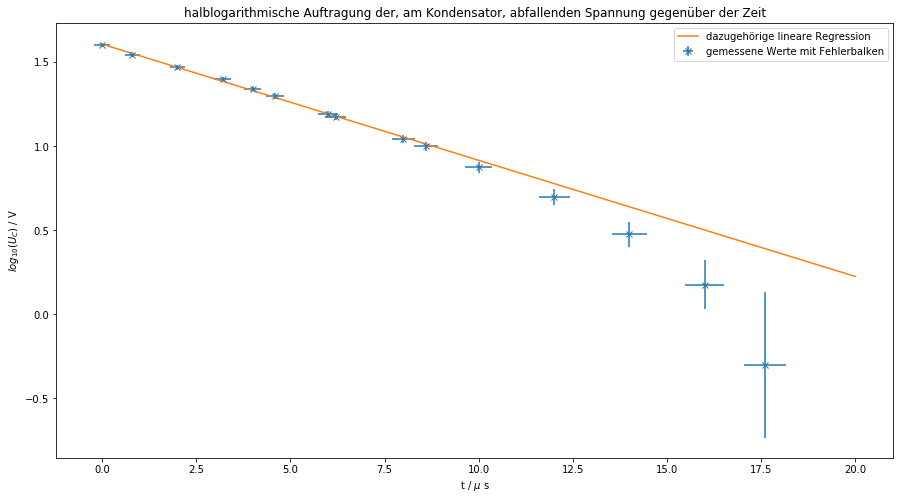

In [28]:

plt.figure(figsize = (15,8))
plt.errorbar(t_c*10**(6), logu_c,dlogu_c,dt_c*10**(6),fmt='x',label='gemessene Werte mit Fehlerbalken')
plt.plot(np.linspace(0,20),linear(np.linspace(0,20)),label = 'dazugehörige lineare Regression')
plt.xlabel(r't / $\mu$ s')
plt.ylabel(r'$log_{10} (U_C)$ / V ')
plt.title('halblogarithmische Auftragung der, am Kondensator, abfallenden Spannung gegenüber der Zeit')
plt.legend()
plt.savefig('56graph1.png')

In [29]:
a2, b2, da2, db2 = ap.GewichteteRegression(t_r*10**6, logu_r,dlogu_r)
def linear2(x):
    return a2 + b2*x

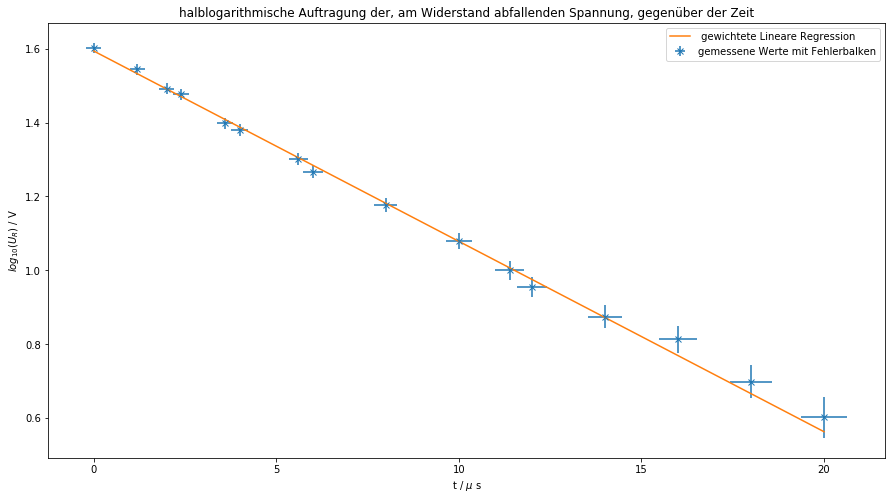

In [30]:
plt.figure(figsize = (15,8))
plt.errorbar(t_r*10**6,logu_r, dlogu_r, dt_r*10**6,'x', label = 'gemessene Werte mit Fehlerbalken')
plt.plot(np.linspace(0,20),linear2(np.linspace(0,20)), label = ' gewichtete Lineare Regression')
plt.xlabel(r't / $\mu$ s')
plt.ylabel(r'$log_{10} (U_R)$ / V ')
plt.title('halblogarithmische Auftragung der, am Widerstand abfallenden Spannung, gegenüber der Zeit')
plt.legend()
plt.savefig('56graph2.png')

In [37]:
tau1 = - np.log10(np.e)/(b1 * 10**6)
tau2 = - np.log10(np.e)/(b2 * 10**6)

dtau1 =  np.log10(np.e) * db1 /(b1)**2 /10**6
dtau2 =  np.log10(np.e) * db2 / (b2)**2 /10**6
print(tau1, dtau1)
print(tau2, dtau2)
print(tau2 *np.log(2),dtau2 *np.log(2))
print(tau1 *np.log(2),dtau1 *np.log(2))
print(b2, db2)

6.284079888954671e-06 1.9174768989974075e-07
8.427792430607992e-06 1.813198223435466e-07
5.841700561620378e-06 1.256813236370595e-07
4.355792257442384e-06 1.32909370632888e-07
-0.05153122665028916 0.0011086690777339662


In [32]:
C = 680 * 10 ** (-12)
R = 10000

R1 = tau1 / C
R2 = tau2 / C

dR1 = dtau1 / C
dR2 = dtau2 / C

print(R1, dR1)
print(R2, dR2)

9241.293954345105 281.98189691138344
12393.812397952928 266.6467975640391


# Direkte Messung der Halbwertszeit

In [33]:
thalb = np.array([ 6.1, 5.7*0.5, 3.4*0.5, 5.8, 3.7, 3.9*0.5])
Rliste = np.array([10,5.6, 3.3, 10, 5.6, 3.3]) *1000

dthalb = np.sqrt((0.03 *thalb)**2 + 0.1 **2)
dRliste = 0.01 * Rliste

tau = thalb / np.log(2) /10**6
dtau = dthalb/np.log(2) /10**6
r_rechnen = tau/C
dr_rechnen = dtau/C
print(tau1, dtau1)
print(tau2, dtau2)

6.284079888954671e-06 1.9174768989974075e-07
8.427792430607992e-06 1.813198223435466e-07


In [34]:
df = pd.DataFrame(data=[r_rechnen, dr_rechnen, Rliste, dRliste],
                  index=['r rechnung', 'dr rechnung', 'R abgelesen', 'dR abgelesen']).T
df

,r rechnung,dr rechnung,R abgelesen,dR abgelesen
0,12942,442,100,100
1,6047,279,56,56
2,3607,238,33,33
3,12305,426,100,100
4,7850,317,56,56
5,4137,246,33,33


In [35]:

print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 r rechnung &  dr rechnung &  R abgelesen &  dR abgelesen \\
\midrule
      12942 &          442 &          100 &           100 \\
       6047 &          279 &           56 &            56 \\
       3607 &          238 &           33 &            33 \\
      12305 &          426 &          100 &           100 \\
       7850 &          317 &           56 &            56 \\
       4137 &          246 &           33 &            33 \\
\bottomrule
\end{tabular}



In [36]:
ap.TTest(12400,9200,300,300)

7.542472332656507

In [4]:
10 * 0.01 

0.1

In [8]:
ap.TTest(10,9.2,0.3,0.1)

2.5298221281347057